Bank marketing is known for its nature of developing a unique brand image, which is treated as the capital reputation of the financial academy. It is very important for a bank to develop good relationship with valued customers accompanied by innovative ideas which can be used as measures to meet their requirements.

Customers expect quality services and returns. There are good chances that the quality factor will be the sole determinant of successful banking corporations. Therefore, Indian banks need to acknowledge the imperative of proactive Bank Marketing and Customer Relationship Management and also take systematic steps in this direction.

What is a Term Deposit ?
A time deposit or term deposit is a deposit in a financial institution with a specific maturity date or a period to maturity, commonly referred to as its "term". Time deposits differ from at call deposits, such as savings or checking accounts, which can be withdrawn at any time, without any notice or penalty. Deposits that require notice of withdrawal to be given are effectively time deposits, though they do not have a fixed maturity date.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination or withdrawal if they give several days notification. Also, there will be a penalty assessed for early termination.

Key Takeways
A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time.
Term deposits are usually short-term deposits with maturities ranging from one month to a few years.
Typically, term deposits offer higher interest rates than traditional liquid savings accounts, whereby customers can withdraw their money at any time.
Objective:
Business goal: Reducing marketing resources by identifying customers who would subscribe to term deposit and thereby direct marketing efforts to them.

### Descripcion de las variables. 

The dataset has the following attributes:

* age (numeric)
* job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")
* contact: contact communication type (categorical: "unknown","telephone","cellular")
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

Lets Begain with the relative questions:

* 1: What is the goal of the bank campaign, and how does it relate to the target variable "deposit"?
* 2: What are the demographic characteristics of the customers in the dataset (age, job, marital status, education)?
* 3: How do the customers' account balances and other financial information (default, balance, loan, housing) relate to their likelihood of making a deposit?
* 4: What time of year and day of the week is the bank most successful in reaching customers?
* 5: How do the duration and frequency of contact (duration, campaign) affect the customers' decision to make a deposit?
* 6: Have the customers been contacted by the bank before (pdays, previous), and does this affect their likelihood of making a deposit?
* 7: What was the outcome of previous bank campaigns (poutcome), and how does it relate to the current campaign's success?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import sklearn
from scipy import stats


from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)


Lets read the dataset:

In [2]:
df = pd.read_csv('bank.csv')

## 1. Data exploration:

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11162.0,NaN,NaN,NaN,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,3,married,6351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,11162,2,no,10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162.0,NaN,NaN,NaN,15.658036,8.42074,1.0,8.0,15.0,22.0,31.0


In [6]:
df.shape

(11162, 17)

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

Data Exploration first insighs: As we can see, there aren't duplicates or missing values in the dataset. 

In [11]:
# we are separating the categorical columns in two groups, numerical and categorical.
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
category_col = df.select_dtypes(include=['object']).columns

# Now we focus on the categorical columns to explore its variables.
for col in category_col:
    print(col, "(", len(df[col].unique()), "values):")
    print(df[col].unique())
    print(df[col].value_counts(normalize=True))
    print("\n")

job ( 12 values):
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64


marital ( 3 values):
['married' 'single' 'divorced']
marital
married     0.568984
single      0.315176
divorced    0.115839
Name: proportion, dtype: float64


education ( 4 values):
['secondary' 'tertiary' 'primary' 'unknown']
education
secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: proportion, dtype: float64


default ( 2 values):
['no' 'yes']
default
no     0.984949
yes    0.015051
Name: proportion, dtype: float64


housing ( 2 

## 2. EDA: With the estadistical study of the data we will try to understand the the objetive of the bank campaing

* 1: What is the goal of the bank campaign, and how does it relate to the target variable "deposit"?

deposit
no     0.52616
yes    0.47384
Name: count, dtype: float64


<Axes: xlabel='deposit', ylabel='count'>

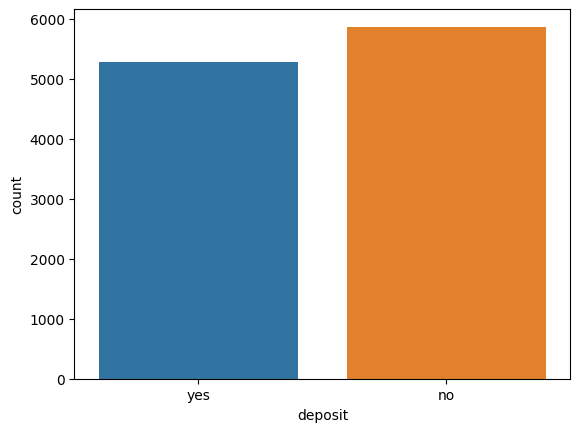

In [11]:
print(df['deposit'].value_counts()/df.shape[0])
sns.countplot(x='deposit', data=df)

# Insight: 
We can see that the goal of the bank campaing is to encourage clients to manke a deposit, so the deposit variable is our target variable that we want to predict.

### 2.: What are the demographic characteristics of the customers in the dataset (age, job, marital status, education)?


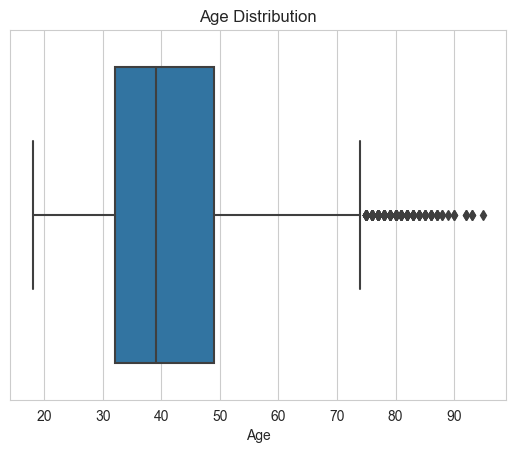

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


In [48]:
sns.set_style('whitegrid')

ax = sns.boxplot(x=df['age'])

ax.set_title('Age Distribution')
ax.set_xlabel('Age')

plt.show()
print(df['age'].describe())

As we can see, the mean age of the costumers is 41 years old, and the standard deviation is 11 years old.

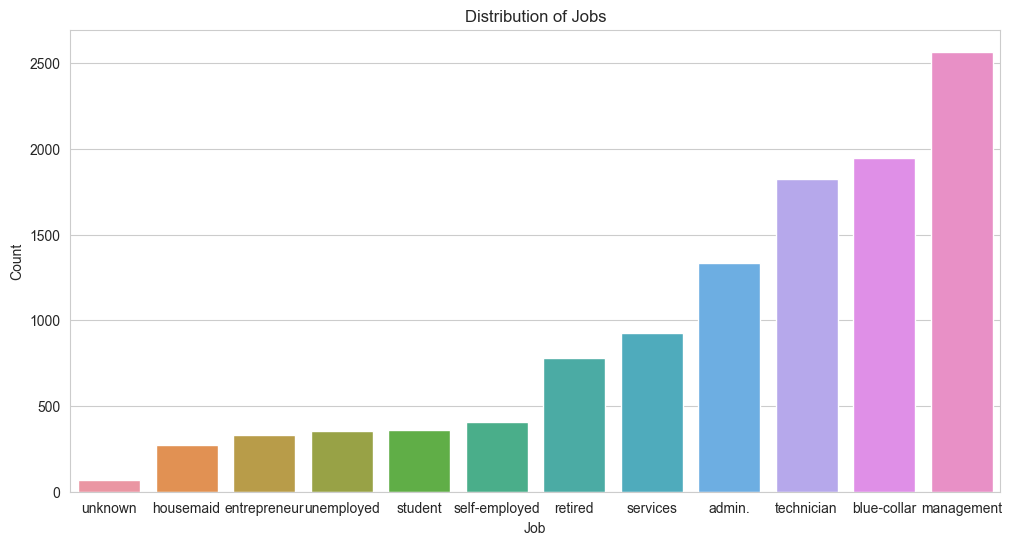

              Job  Value Counts
0      management          2566
1     blue-collar          1944
2      technician          1823
3          admin.          1334
4        services           923
5         retired           778
6   self-employed           405
7         student           360
8      unemployed           357
9    entrepreneur           328
10      housemaid           274
11        unknown            70


In [63]:
job_counts = df['job'].value_counts().sort_values()
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=df['job'], order=job_counts.index, ax=ax)
ax.set_title('Distribution of Jobs')
ax.set_xlabel('Job')
ax.set_ylabel('Count')
plt.show()

job_counts = df['job'].value_counts().reset_index()
job_counts.columns = ['Job', 'Value Counts']
job_counts = job_counts.sort_values(by=['Value Counts'], ascending=False)
print(job_counts)


As we can see here, the most job categories with the highest number of people are Management and Blue-collar.

<Axes: xlabel='education', ylabel='count'>

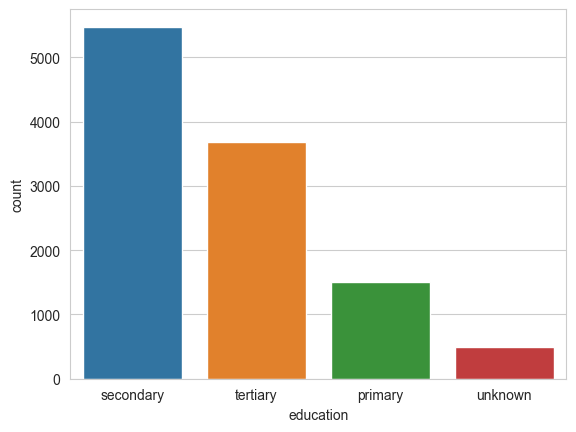

In [41]:
# Plot the counts of education
sns.countplot(data=df, x='education')


The are more clients with secondary education than teriary education.

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

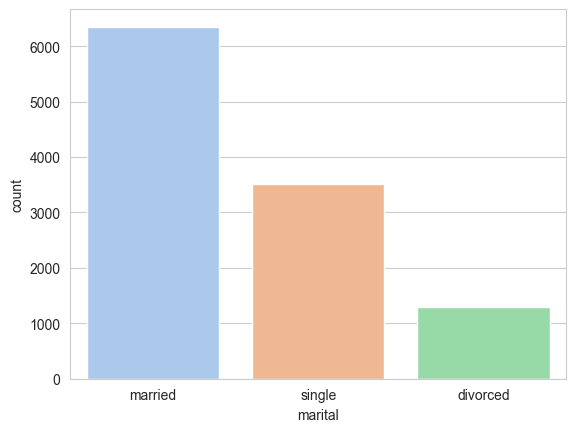

In [65]:
# Counts of marital status categories
sns.countplot(data=df, x='marital')
  

df['marital'].value_counts()

as we can see here, most of the clients are married, the second large group of clients are single.

<Axes: xlabel='housing', ylabel='count'>

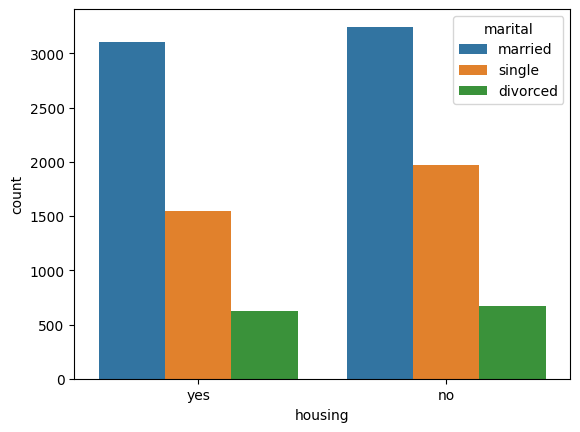

In [12]:
# Plot the counts of housing divided by marital status.
sns.countplot(data=df, x='housing', hue='marital')


Now, we are exploring the clients of the bank, we 've made a graphic that shows wich group (single, married and divorce) posses a housing loan.
According to the following graphic description the largest group is the married gruup and the smallest group is the divorced people.

<Axes: xlabel='loan', ylabel='count'>

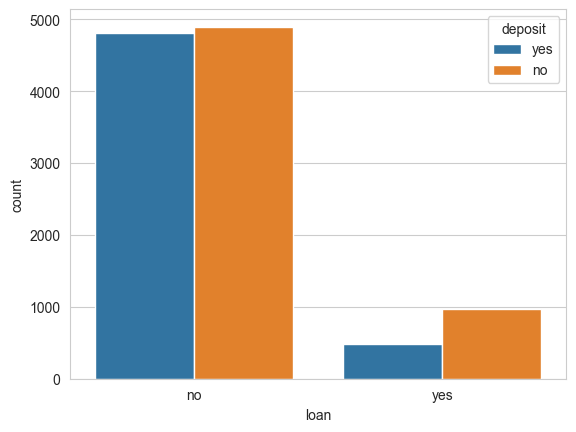

In [43]:
# Plot the counts of loan
sns.countplot(data=df, x='loan', hue='deposit')


As we can see here, the number of clients that have made a deposit without a loan is relatively big compared to the number of clients that have made a deposit with a loan in the bank, this information tells us wich clients we need to aim for.

<Axes: xlabel='deposit', ylabel='previous'>

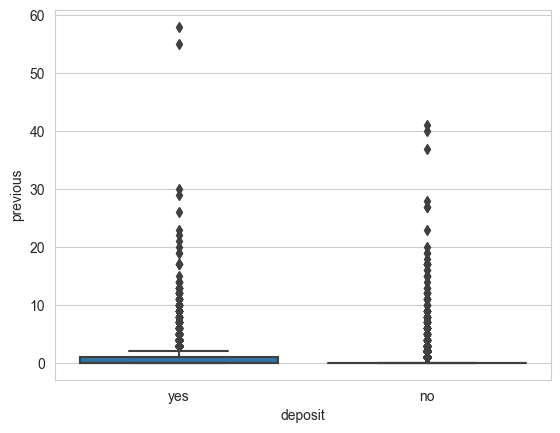

In [46]:
# Create a boxplot of previous by deposit status
sns.boxplot(data=df, x='deposit', y='previous')


In this graphic we try to understand if the clients who the bank've contacted previously have been made a deposit, as we can see, the group is relatively big as the number of outliers. 

deposit,no,yes
poutcome,,
failure,0.50,0.50
other,0.43,0.57
success,0.09,0.91
unknown,0.59,0.41


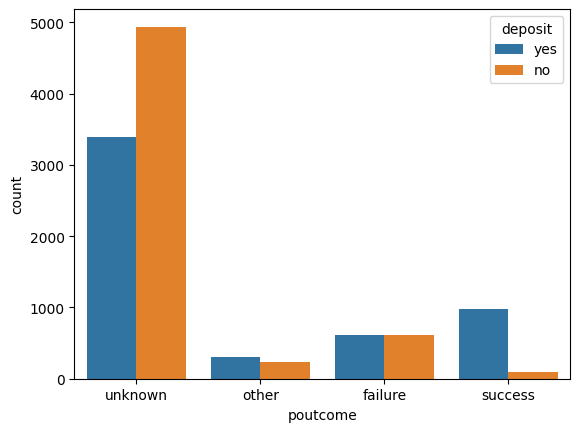

In [19]:
# Plot the counts of poutcome for the current campaign
sns.countplot(data=df, x='poutcome', hue='deposit')

# Cross-tabulate poutcome and deposit to calculate the success rate for each previous outcome
pd.crosstab(df['poutcome'], df['deposit'], normalize='index').round(2)



We've made a graphic and a dataframe tha shows the success of the prevouse campaing, the client who had suscribed in the previous campaing are more likely to deposit in the next campaing, however the clients who are registrated by "other" are more likely to deposit in the next campaing.

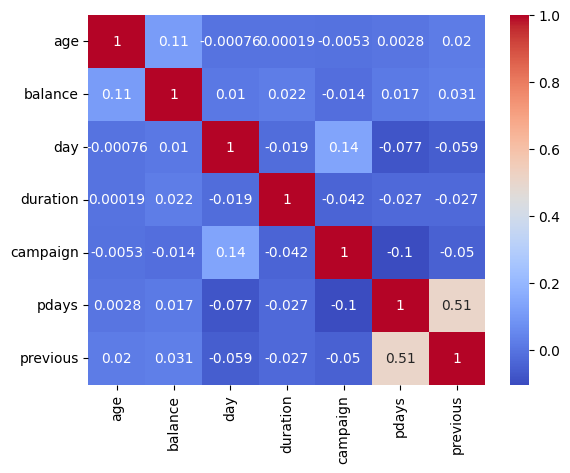

In [20]:
# Now we'll select only the numerical columns and create a correlation matrix for numerical columns

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical_corr = df[numerical_cols].corr()
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm')
plt.show()

We've made a correlation matrix between the numerical columns, as we can see the balance and age have a correlation (0.11) the same as the balance and previos (0.031). previos and pdays have a strong correlation (0.51).

## Stadistical Analysis

In [ ]:
# Calculate descriptive statistics
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
desc_stats = df[num_cols].describe()
desc_stats

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


We performed a descriptive stadistic from the most significant variables.

* From this we can see that the dataset contains information on 11162 clients of the bank.
* The average age of the clients is around 41 years.
* the average balance of the clients is 1528.5 with a standard deviation of 3225

In [ ]:
# t-test
loan_yes = df[df['loan'] == 'yes']['balance']
loan_no = df[df['loan'] == 'no']['balance']
t_stat, p_value = stats.ttest_ind(loan_yes, loan_no, equal_var=False)

# Print results
print("T-statistic: {:.2f}".format(t_stat))
print("p-value: {:.4f}".format(p_value))


T-statistic: -11.91
p-value: 0.0000


## Ingsights:
We've made a T-test between two groups of bank customers based on whether they have a personal loan or not.

The negative t-statistic indicates that the mean balance of those with loan is significantly lower than those without a loan.

The P-value is low and indicates that the difference in means between the two groups of bank customers is unlikely to be due to chance

## 3. Feature engineering:
### We will perform some feature engineering to extract more info and improve the predictive model.

In [ ]:
# we perform the one-hot encoding to convert categorical variables into numeric, after converting those variables to numeric we fit the model to a logistic regression.
# One-hot encode categorical variables
X = pd.get_dummies(df.drop(['deposit'], axis=1))
# Convert target variable to binary
y = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Print coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': logreg.coef_[0]})
print(coef_df)


                  feature  coefficient
0                     age    -0.016493
1                 balance     0.000042
2                     day    -0.018278
3                   month     0.032130
4                duration     0.004470
5                campaign    -0.323629
6                   pdays     0.000354
7                previous     0.206981
8              job_admin.    -0.005995
9         job_blue-collar    -0.114705
10       job_entrepreneur    -0.012639
11          job_housemaid    -0.003264
12         job_management     0.017678
13            job_retired     0.072124
14      job_self-employed    -0.007447
15           job_services    -0.039360
16            job_student     0.031410
17         job_technician    -0.017915
18         job_unemployed     0.004493
19            job_unknown     0.001004
20       marital_divorced     0.003060
21        marital_married    -0.090007
22         marital_single     0.012331
23      education_primary    -0.045908
24    education_secondary

## F.E One-hote encoding Insights:
This is coefficients of the logistic regression model that was fit using all the variables in the data set except for the target variable deposit. The logistic regression model predicts the probability that the target variable is 1 (i.e., the customer makes a deposit), given the values of the input features. A positive coefficient for a feature indicates that an increase in the value of that feature is associated with an increased probability of the customer making a deposit, while a negative coefficient indicates that an increase in the value of that feature is associated with a decreased probability of the customer making a deposit.

For example, we can see that the coefficient for balance is positive, which suggests that customers with higher account balances are more likely to make a deposit. Conversely, the coefficient for campaign is negative, which suggests that customers who have been contacted by the bank more times are less likely to make a deposit.

In [25]:

# Define the age bins
age_bins = [0, 20, 30, 40, 50, 60, 80]

# Define the bin labels
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Create a new column 'age_group' using pandas cut function
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Print the first 5 rows to verify the new column
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,deposit_encoded
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60,1


<Axes: xlabel='age_group', ylabel='count'>

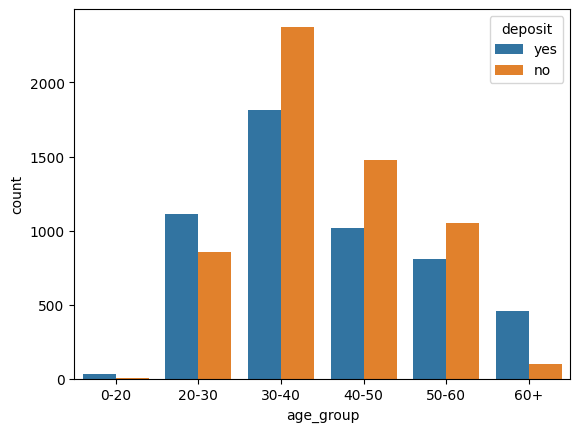

In [33]:
sns.countplot(data=df, x='age_group', hue='deposit')


We've performed a feature selection called Binning, wich transform continuous numerical values into categorical features, then we've a graphic that represents the age group, as we can see here the more active clients are between the 20 and 60 years old.

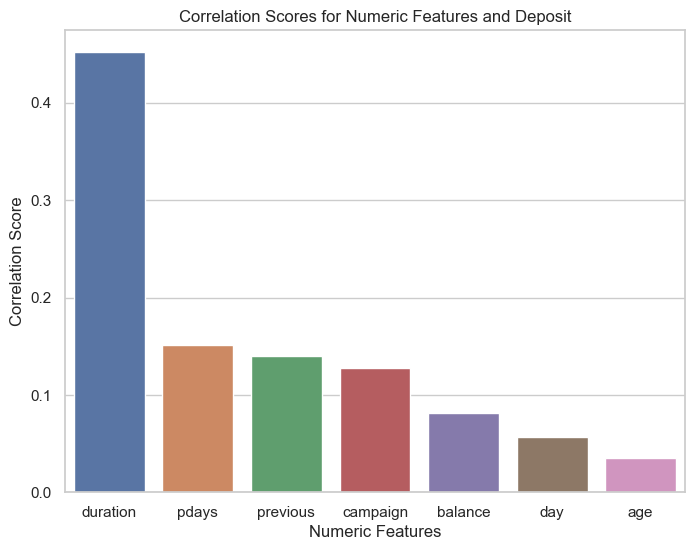

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['deposit_encoded'] = le.fit_transform(df['deposit'])

num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

corr_scores = []
for feature in num_features:
    corr_score = abs(df[feature].corr(df['deposit_encoded']))
    corr_scores.append((feature, corr_score))


corr_scores = sorted(corr_scores, key=lambda x: x[1], reverse=True)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=[score[0] for score in corr_scores], y=[score[1] for score in corr_scores])
ax.set_xlabel('Numeric Features')
ax.set_ylabel('Correlation Score')
ax.set_title('Correlation Scores for Numeric Features and Deposit')
plt.show()



We have performed a feature selection on the numeric features, and based on the correlation betwen the numerical features and the target variable "deposit", the stronger variables are:
* Duration
* pdays
* previous
* campaign
* balance

# Machine Learning Models

We will begin with logistic regression.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[num_features]
y = df['deposit_encoded']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#create a logistic regression model and fit it to the data.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

score = logreg.score(X_test,y_test)
print(score)

0.7223466188983431


We've performed a logistic regression model and the model correctly predicted the deposit (yes or no) for 72%

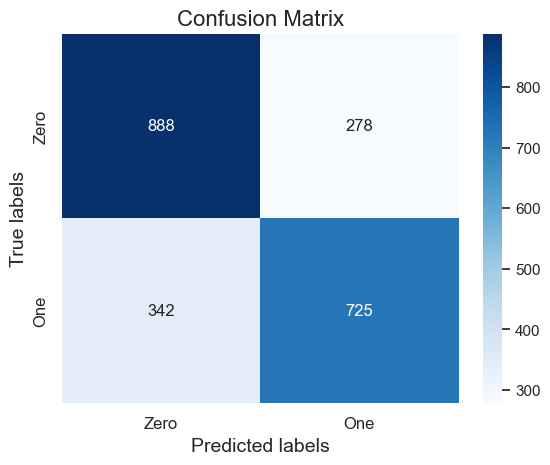

In [46]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define labels for the plot
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()


In [47]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1166
           1       0.72      0.68      0.70      1067

    accuracy                           0.72      2233
   macro avg       0.72      0.72      0.72      2233
weighted avg       0.72      0.72      0.72      2233



We've performed a classification report on the logistic regression and here are the results:

* Precision: Our model predicts 0.72 % meeaning 72% accuracy.
* Recall: Our model correctly identifies 76% of the samples and for class 0 is slightly less accurate than for class 1.
* F1-score: correctly predicts for both class 0 and class 1.

Summrising the results, our is good predicting who will not make a deposit than those who will. 

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier class
tree_model = DecisionTreeClassifier()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

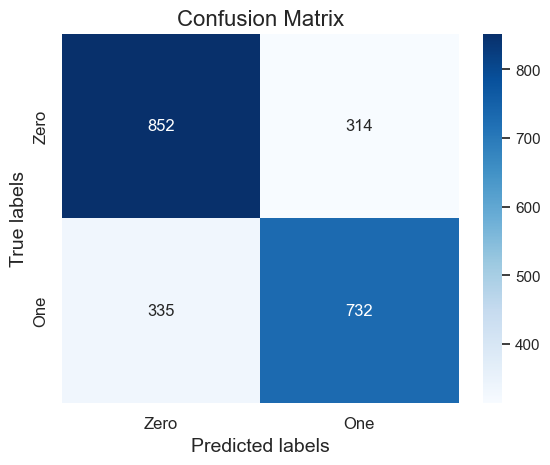

In [68]:
y_pred = tree.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.709
Precision: 0.700
Recall: 0.686
F1 score: 0.693


As we can see, with the desicion tree model, the metrics are slightly similar to the logistic regression except for the f1 score and precision. these metrics tell us that the desicion tree model is no a quite good fit.

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)


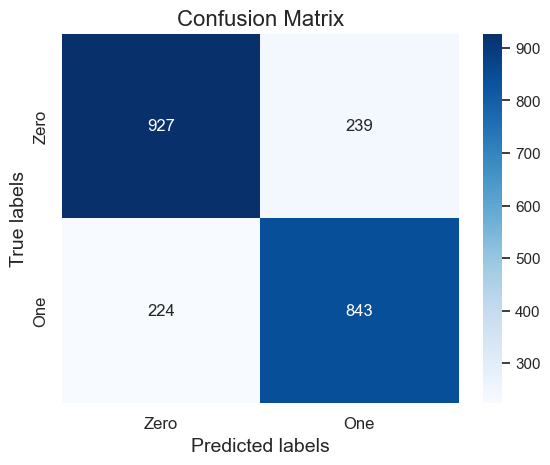

In [67]:
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

# Create a function to plot
def plot_confusion_matrix(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels(categories, fontsize=12)
    ax.set_title('Confusion Matrix', fontsize=16)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [65]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.793
Precision: 0.779
Recall: 0.790
F1 score: 0.785


We've perdormed a random forest model and the model seems to perform better than the other ones. all the metrics are higher than logistic regression and desicion tree metrics. 